In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [12]:
# Generate synthetic data
X, _ = make_blobs(n_samples=1000, centers=3, random_state=42, cluster_std=1.0)

In [13]:
# Convert data to DataFrame for visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])

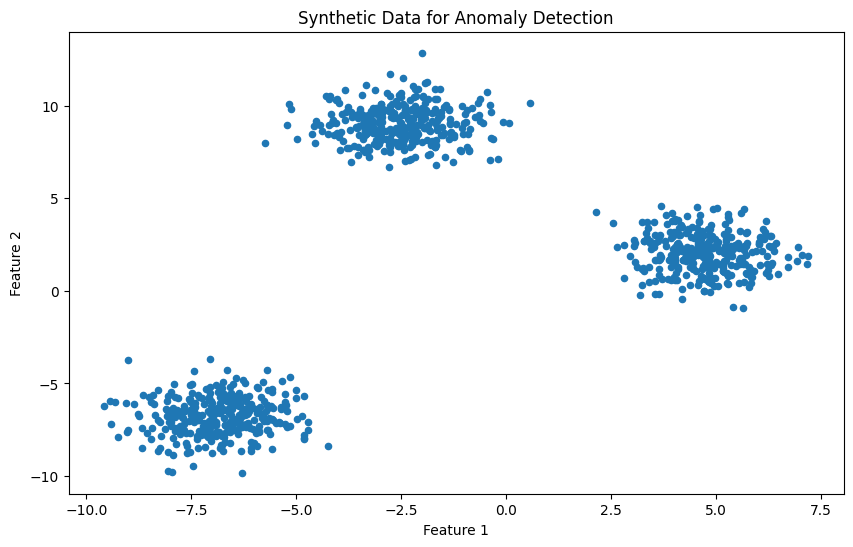

In [14]:
 # Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature1'], df['Feature2'], s=20)
plt.title('Synthetic Data for Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [15]:
# Fit the Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X)

IsolationForest(contamination=0.1, random_state=42)

In [16]:
# Predict the anomaly scores
df['Anomaly Score'] = model.decision_function(X)

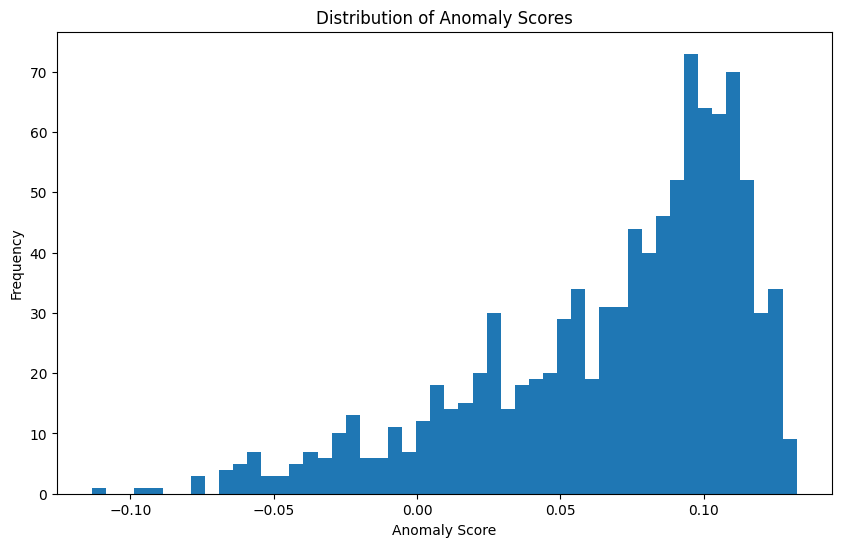

In [17]:
# Visualize the anomaly scores
plt.figure(figsize=(10, 6))
plt.hist(df['Anomaly Score'], bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores')
plt.show()

In [18]:
# Define a threshold for identifying anomalies
threshold = df['Anomaly Score'].quantile(0.95)

In [19]:
# Marking anomalies based on the threshold
df['Anomaly'] = df['Anomaly Score'] > threshold

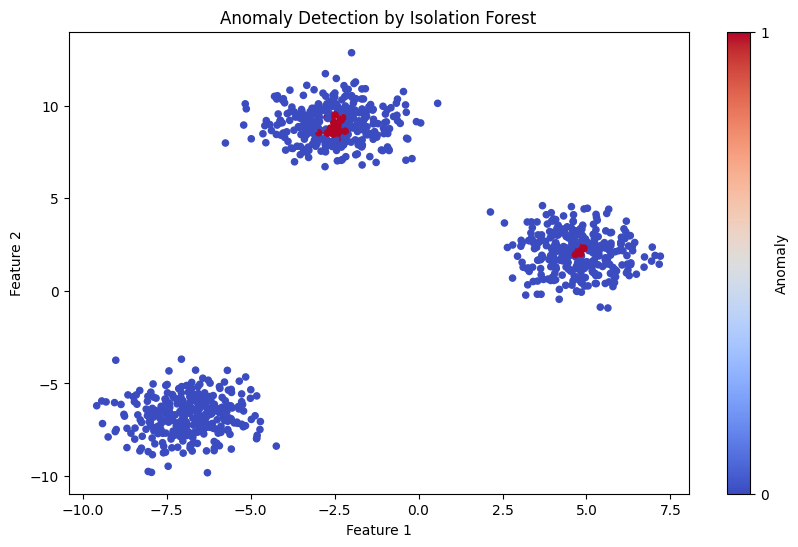

In [20]:
# Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Anomaly'], cmap='coolwarm', s=20)
plt.title('Anomaly Detection by Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Anomaly', ticks=[0, 1])
plt.show()